## Secant Method

In [106]:
def secant(f,x0,x1,e = 10**-4,N=100):
  for i in range (0,N):
    print("%d   | %f    | %f    " %(i,x1,f(x1)))
    if abs(f(x1)) < e:
      return x1,i
    x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
    x0 = x1
    x1 = x2
  print("Maximum iteration")
  return x1, i

f  = lambda x: x**4+x-10
x0 = 8
x1 = 9

x_root, iteration = secant(f,x0,x1)
print('Result : ', x_root)
print('In %d iteration' %iteration)

0   | 9.000000    | 6560.000000    
1   | 6.339822    | 1611.844208    
2   | 5.473278    | 892.881393    
3   | 4.397115    | 368.224827    
4   | 3.641822    | 169.545469    
5   | 2.997283    | 73.704241    
6   | 2.501617    | 31.665262    
7   | 2.128263    | 12.644674    
8   | 1.880062    | 4.373694    
9   | 1.748813    | 1.102304    
10   | 1.704589    | 0.147229    
11   | 1.697771    | 0.006156    
12   | 1.697474    | 0.000037    
Result :  1.6974736654325215
In 12 iteration


### Draw Chart

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

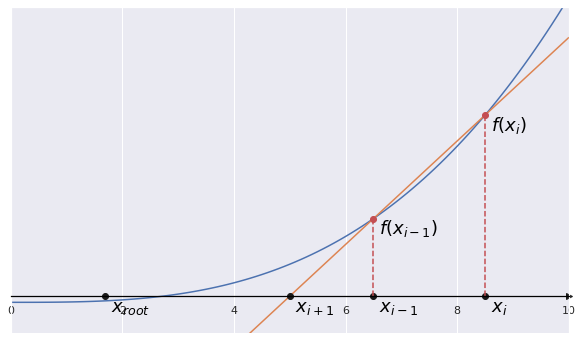

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

f  = lambda x: x**3-20
a  = 0
b  = 10

x0 = 6.5
x1 = 8.5
x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))

x = np.arange(a,b,0.1)

fig = plt.figure(figsize=(10,6))
ax  = plt.axes(xlim=(a,b),ylim=(min(f(x))-100,max(f(x))))

plt.yticks([],[])

ax.spines["bottom"].set_position(("data", 0))
ax.spines["bottom"].set_color('black')
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)

sns.lineplot(x=x, y=f(x))

ya = ((a-x0)/(x1-x0))*(f(x1)-f(x0)) + f(x0)
yb = ((b-x0)/(x1-x0))*(f(x1)-f(x0)) + f(x0)
ax.plot([a,b],[ya,yb])

ax.plot([x0],[f(x0)],'ro')
ax.plot([x1],[f(x1)],'ro')

ax.plot([x0],0, 'ko')
ax.plot([x1],0, 'ko')
ax.plot([x2],0, 'ko')

ax.text(x=x0+0.1, y=-50, s=r'$x_{i-1}$', color='black', fontsize=18, horizontalalignment='left')
ax.text(x=x1+0.1, y=-50, s=r'$x_{i}$', color='black', fontsize=18, horizontalalignment='left')
ax.text(x=x2+0.1, y=-50, s=r'$x_{i+1}$', color='black', fontsize=18, horizontalalignment='left')
ax.text(x=x0+0.1, y=f(x0)-50, s=r'$f(x_{i-1})$', color='black', fontsize=18, horizontalalignment='left')
ax.text(x=x1+0.1, y=f(x1)-50, s=r'$f(x_{i})$', color='black', fontsize=18, horizontalalignment='left')
ax.text(x=x_root+0.1, y=-50, s=r'$x_{root}$', color='black', fontsize=18, horizontalalignment='left')

ax.plot([x0,x0],[0,f(x0)],'r', linestyle='dashed')
ax.plot([x1,x1],[0,f(x1)],'r', linestyle='dashed')

ax.plot([x_root],[0], 'ko')

# plt.savefig('secant.png')
# from google.colab import files
# files.download('secant.png')

plt.show()

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
%matplotlib inline
sns.set()

f  = lambda x: x**4+x-10
x0 = 8
x1 = 9
x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))

a  = 0
b  = 10
x = np.arange(a,b,0.1)

fig = plt.figure(figsize=(10,6))
ax  = plt.axes(xlim=(a,b),ylim=(min(f(x))-200,max(f(x))))

plt.yticks([],[])

ax.spines["bottom"].set_position(("data", 0))
ax.spines["bottom"].set_color('black')

sns.lineplot(x=x, y=f(x))

ya = ((a-x0)/(x1-x0))*(f(x1)-f(x0)) + f(x0)
yb = ((b-x0)/(x1-x0))*(f(x1)-f(x0)) + f(x0)

s_line, = ax.plot([a,b],[ya,yb], 'red')
x0_dot, = ax.plot([x0],[0], 'yo', markersize=10)
x1_dot, = ax.plot([x1],[0], 'go', markersize=10)
x2_dot, = ax.plot([x2],[0], 'ko', markersize=10)
v0_line, = ax.plot([x0,x0],[f(x0),0], 'k', linestyle='dashed')
v1_line, = ax.plot([x1,x1],[f(x1),0], 'k', linestyle='dashed')

ax.legend(['function','secant line',r'$x_{i-1}$',r'$x_{i}$',r'$x_{i+1}$'])

def secant_ani(f,x0,x1):
  e = 10**-4
  N = 15

  arr_x0 = np.array([])
  arr_x1 = np.array([])
  arr_x2 = np.array([])
  arr_ya = np.array([])
  arr_yb = np.array([])

  for i in range (0,N):

    ya = ((a-x0)/(x1-x0))*(f(x1)-f(x0)) + f(x0)
    yb = ((b-x0)/(x1-x0))*(f(x1)-f(x0)) + f(x0)
    x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))

    arr_x0 = np.append(arr_x0,x0)
    arr_x1 = np.append(arr_x1,x1)
    arr_x2 = np.append(arr_x2,x2)
    arr_ya = np.append(arr_ya,ya)
    arr_yb = np.append(arr_yb,yb)

    if abs(f(x1)) < e:
      return arr_x0,arr_x1,arr_x2,arr_ya,arr_yb,

    x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
    x0 = x1
    x1 = x2
  return arr_x0,arr_x1,arr_x2,arr_ya,arr_yb,

arr_x0,arr_x1,arr_x2,arr_ya,arr_yb, = secant_ani(f,x0,x1)

def animate(i):
  s_line.set_data([a,b],[arr_ya[i],arr_yb[i]])
  x0_dot.set_data([arr_x0[i]],[0])
  x1_dot.set_data([arr_x1[i]],[0])
  x2_dot.set_data([arr_x2[i]],[0])
  v0_line.set_data([arr_x0[i],arr_x0[i]],[f(arr_x0[i]),0])
  v1_line.set_data([arr_x1[i],arr_x1[i]],[f(arr_x1[i]),0])

  return s_line, x0_dot, x1_dot, x2_dot, v0_line, v1_line,


plt.rcParams['animation.html'] = 'html5'
anim = animation.FuncAnimation(fig, animate, frames=len(arr_x0),
                                      blit=False, repeat=True, interval=1000)
plt.close()
anim

# anim.save('secant.mp4', fps=1, extra_args=['-vcodec', 'libx264'])
# from google.colab import files
# files.download("secant.mp4")